In [ ]:
__author__ = "Phillip Lakaschus"
__email__ = "lakaschus@th.physik.uni-frankfurt.de"

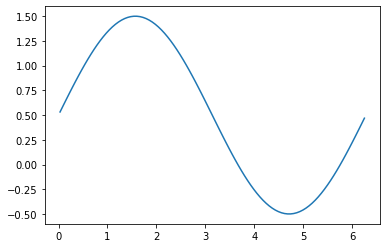

0.05013227462768555


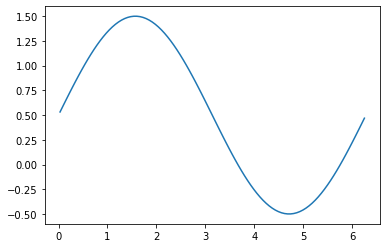

time:  0.0


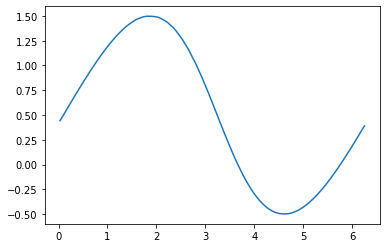

time:  0.20202020202020204


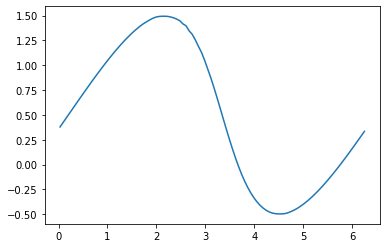

time:  0.4040404040404041


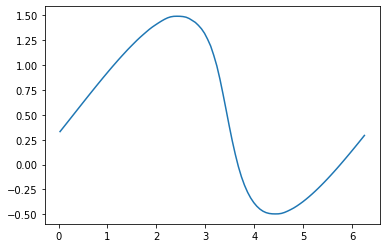

time:  0.6060606060606061


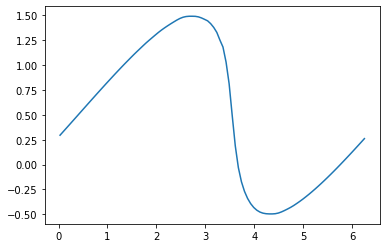

time:  0.8080808080808082


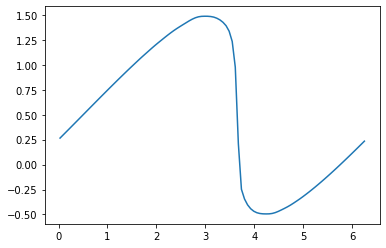

time:  1.0101010101010102


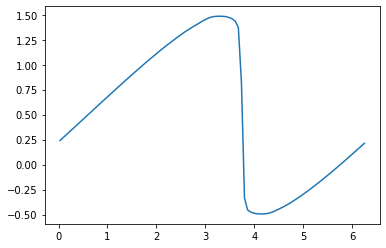

time:  1.2121212121212122


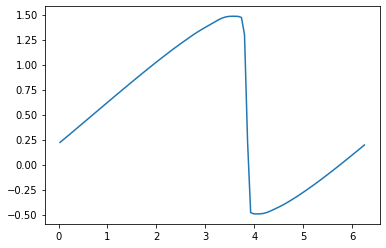

time:  1.4141414141414144


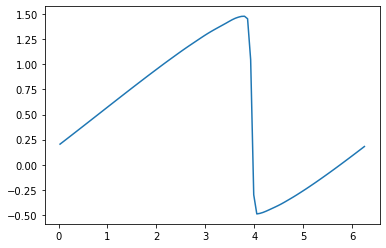

time:  1.6161616161616164


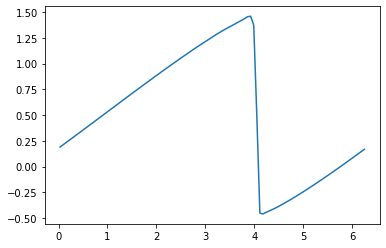

time:  1.8181818181818183


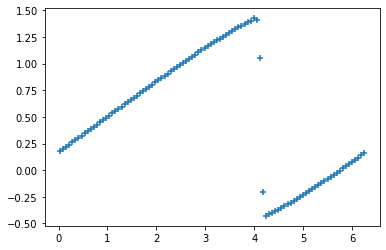

time:  2.0
u_max:  1.426212008132038
u(x_0):  0.17911354112198444
u(x_1):  0.1997060021236422
u(x_N-1):  0.1380880766192702
u(x_N):  0.15855640963677411


In [29]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

%matplotlib inline

N = 100
x = np.linspace(0, 2*np.pi, N+1)
N_t = 100
t = np.linspace(0, 2, N_t)

xc = 0.5*np.array(x[:-1]+x[1:])

dx = x[1] - x[0]

u0 = 0.5 + np.sin(xc)

plt.plot(xc, u0)
plt.show()

start = time.time()  

def minmod(a, b):
  minmod = (np.abs(a) < np.abs(b)).astype(int)
  minmod2 = (np.abs(b) < np.abs(a)).astype(int)
  return 1/2*(np.sign(a) + np.sign(b))*(minmod*np.abs(a) + minmod2*np.abs(b)) 

def dudt(t, u):
  u = np.append(u[-1], np.append(u, u[0])) # periodic boundary conditions
  
  limiter = minmod((u[1:-1] - u[:-2])/dx, (u[2:] - u[1:-1])/dx)
  uLForw = u[0] + (u[1] - u[0])/2 
  uLCent = u[1:-1] + dx/2*limiter
  uL = np.append(uLForw, uLCent)
  
  uRBack = u[-1] - (u[-1] - u[-2])/2
  uRCent = u[1:-1] - dx/2*limiter
  uR = np.append(uRCent, uRBack)

  # Flux
  FL = uL**2/2
  FR = uR**2/2
 
  # characteristic velocity
  FL_d = uL
  FR_d = uR
  
  prop = (np.abs(FL_d) >= np.abs(FR_d)).astype(int)*np.abs(FL_d) + (np.abs(FL_d) < np.abs(FR_d)).astype(int)*np.abs(FR_d)
    
  fu_interface = (FL + FR)/2 - prop/2*(uR - uL)

  dudt =  (fu_interface[:-1] - fu_interface[1:])/dx
  return dudt
  
def solution(u0):
    """https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html"""
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='RK45') # explicit Runge Kutta
    return sol.y

sol = solution(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])

plt.scatter(xc, sol[:,-1], marker='+')
plt.show()
print("time: ", t[-1])
print("u_max: ", max(sol[:,-1]))
print("u(x_0): ", sol[:,-1][0])
print("u(x_1): ", sol[:,-1][1])
print("u(x_N-1): ", sol[:,-1][-2])
print("u(x_N): ", sol[:,-1][-1])
# print(sol[-1])

21.531464099884033


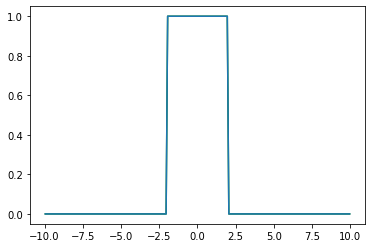

time:  0.0


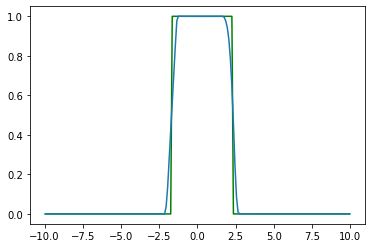

time:  0.30303030303030304


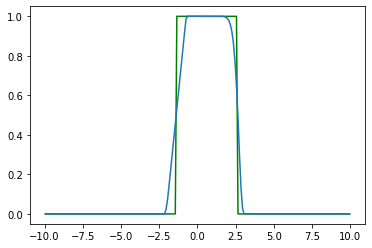

time:  0.6060606060606061


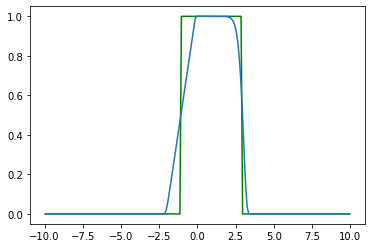

time:  0.9090909090909092


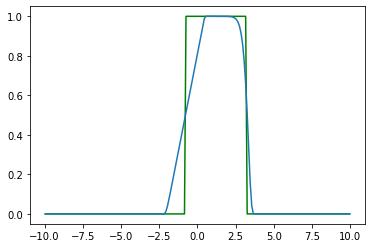

time:  1.2121212121212122


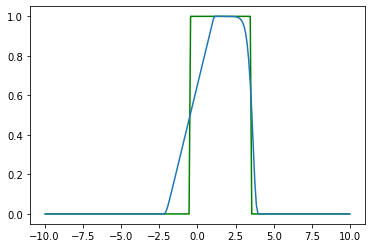

time:  1.5151515151515151


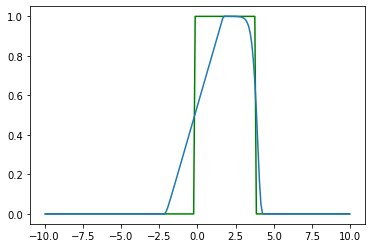

time:  1.8181818181818183


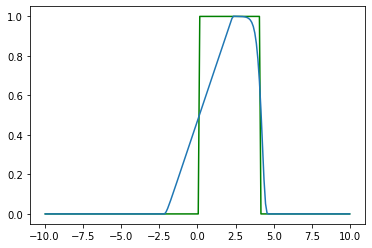

time:  2.121212121212121


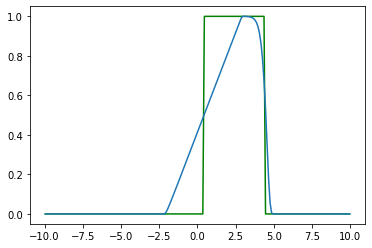

time:  2.4242424242424243


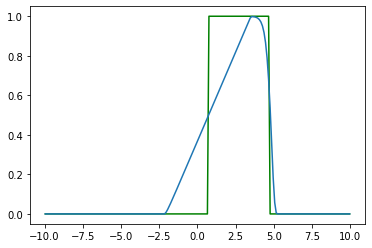

time:  2.7272727272727275


In [ ]:
def solution2(u0):
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='Radau') # Implicit Runge Kutta
    return sol.y

sol = solution2(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, analytic_sol(xc, t[i]), color='green')
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])

24.242358207702637


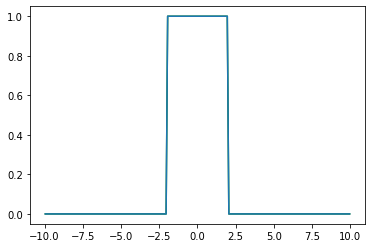

time:  0.0


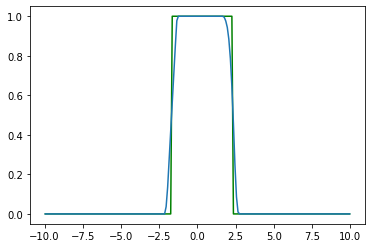

time:  0.30303030303030304


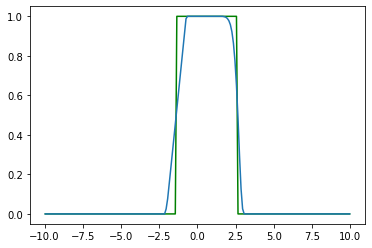

time:  0.6060606060606061


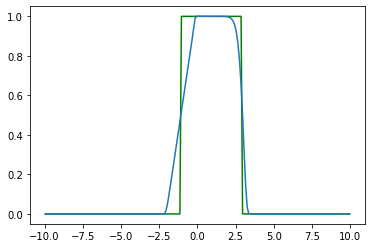

time:  0.9090909090909092


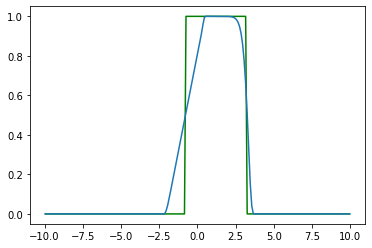

time:  1.2121212121212122


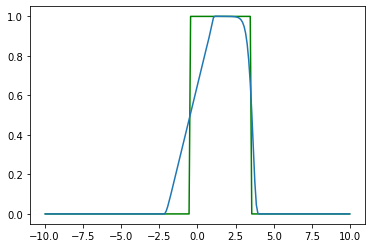

time:  1.5151515151515151


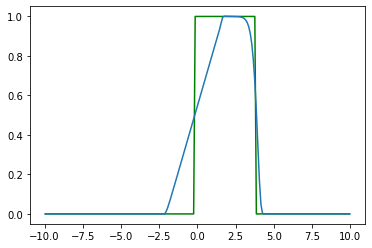

time:  1.8181818181818183


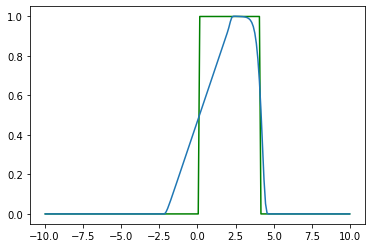

time:  2.121212121212121


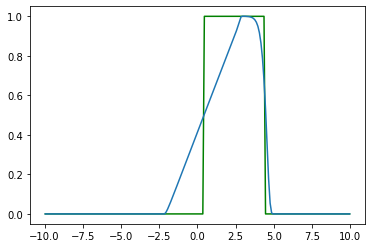

time:  2.4242424242424243


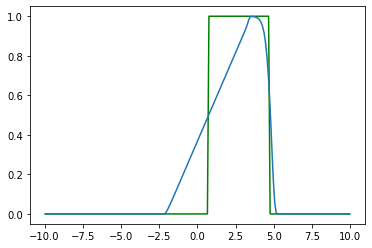

time:  2.7272727272727275


In [ ]:
def solution3(u0):
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='BDF') # Implicit Euler(?)
    return sol.y

sol = solution3(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, analytic_sol(xc, t[i]), color='green')
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])